1. Binning (Discretization)

Convert continuous variables into categories.

Example:

Age → Group into "young", "middle-aged", "senior".

Income → Low, medium, high income bins.

In [9]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your CSV
df = pd.read_csv("Loan_Default.csv")

# -----------------------------
# Preprocessing
# -----------------------------

# Encode 'income' column
le_income = LabelEncoder()
df['IncomeGroup_enc'] = le_income.fit_transform(df['income'].astype(str))

# Encode 'age' column (since it has values like '>74', '<25', etc.)
le_age = LabelEncoder()
df['age_enc'] = le_age.fit_transform(df['age'].astype(str))

# Ensure numeric columns are really numbers
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df['Credit_Score'] = pd.to_numeric(df['Credit_Score'], errors='coerce')

# Handle missing values (optional: you can use median instead of 0)
df.fillna(0, inplace=True)

# -----------------------------
# Feature selection
# -----------------------------
X = df[['age_enc', 'IncomeGroup_enc', 'loan_amount', 'Credit_Score']]
y = df['Status']  # Replace with your actual target column if different

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Train RandomForest model
# -----------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Predictions and evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.737135938656084
Confusion Matrix:
 [[20842  1652]
 [ 6164  1076]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84     22494
           1       0.39      0.15      0.22      7240

    accuracy                           0.74     29734
   macro avg       0.58      0.54      0.53     29734
weighted avg       0.68      0.74      0.69     29734



2. Addressing Multicollinearity

Check if numerical features are highly correlated with each other.

Use Variance Inflation Factor (VIF) or correlation matrix.

Drop or combine highly correlated features to avoid redundancy.

In [12]:
# Select all numeric features, excluding the target column
X_all = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Status'])
y = df['Status']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train-test split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train model with all features
model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_train_a, y_train_a)
y_pred_a = model_all.predict(X_test_a)
acc_all = accuracy_score(y_test_a, y_pred_a)

print("Accuracy with all numeric features:", round(acc_all, 4))

Accuracy with all numeric features: 1.0


3. Target Encoding with Caution

Encode categorical variables based on the target distribution.

Example: Encode LoanPurpose by calculating the default rate for each purpose.

Important: Apply using proper cross-validation to avoid data leakage.

In [17]:
# Encode categorical columns if needed
from sklearn.preprocessing import LabelEncoder

# Example: encode 'income' if categorical
le_income = LabelEncoder()
df['income_enc'] = le_income.fit_transform(df['income'].astype(str))

# Example: encode 'age' if categorical
le_age = LabelEncoder()
df['age_enc'] = le_age.fit_transform(df['age'].astype(str))

# Select features that exist
X = df[['loan_amount', 'Credit_Score', 'income_enc', 'age_enc']]
y = df['Status']  # Your actual target column
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with target encoding): {accuracy:.4f}")

Model Accuracy (with target encoding): 0.7371


4. Handling Rare Categories

Combine rare categories into an "Other" group in categorical variables to avoid sparse representations.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode the existing 'loan_purpose' column
le = LabelEncoder()
df['LoanPurpose_enc'] = le.fit_transform(df['loan_purpose'].astype(str))

X = df[['loan_amount', 'income', 'Credit_Score', 'LoanPurpose_enc']]
y = df['Status']  # your actual target column

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7270128472455775
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     22494
           1       0.37      0.17      0.23      7240

    accuracy                           0.73     29734
   macro avg       0.57      0.54      0.53     29734
weighted avg       0.67      0.73      0.69     29734



5. Robust Scaling
For datasets with many outliers, use RobustScaler, which uses median and IQR instead of mean and standard deviation.

In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_to_scale = ['income', 'loan_amount', 'Credit_Score', 'rate_of_interest', 'dtir1']

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df[features_to_scale].head()

,income,loan_amount,Credit_Score,rate_of_interest,dtir1
0,-0.756098,-0.750000,0.293532,-2.500000,0.380952
1,-0.097561,-0.375000,-0.731343,-2.500000,-1.761905
2,0.817073,0.458333,0.671642,0.540000,0.428571
3,1.304878,0.666667,-0.557214,0.333333,0.238095
4,1.012195,1.666667,-0.482587,0.166667,0.095238


6. Synthetic Feature Creation
Derive interaction terms like Income / LoanAmount or MonthsEmployed * CreditScore.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Base model features (simple)
X_base = df[['loan_amount', 'income', 'Credit_Score']]
y = df['Status']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_base, y, test_size=0.2, random_state=42
)

model_base = RandomForestClassifier(random_state=42)
model_base.fit(X_train_b, y_train_b)

y_pred_base = model_base.predict(X_test_b)
accuracy_base = accuracy_score(y_test_b, y_pred_base)


# 🔥 Synthetic feature model (all valid columns)
X_synth = df[['loan_amount', 'income', 'dtir1',
              'Credit_Score', 'LTV', 'term',
              'LoanPurpose_enc', 'IncomeGroup_enc']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_synth, y, test_size=0.2, random_state=42
)

model_synth = RandomForestClassifier(random_state=42)
model_synth.fit(X_train_s, y_train_s)

y_pred_s = model_synth.predict(X_test_s)
accuracy_synth = accuracy_score(y_test_s, y_pred_s)

print(f"Accuracy without synthetic features: {accuracy_base:.4f}")
print(f"Accuracy with synthetic features:    {accuracy_synth:.4f}")


Accuracy without synthetic features: 0.7191
Accuracy with synthetic features:    0.8737


7. Pipeline Automation with ColumnTransformer
Automate preprocessing by applying different transformations to numerical and categorical columns without manual steps.

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Numeric and categorical features
numeric_features = [
    'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
    'Upfront_charges', 'term', 'property_value', 'total_units',
    'income', 'Credit_Score', 'LTV', 'dtir1'
]

categorical_features = [
    'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
    'loan_purpose', 'Credit_Worthiness', 'open_credit',
    'business_or_commercial', 'Neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'occupancy_type',
    'Secured_by', 'credit_type', 'co-applicant_credit_type',
    'submission_of_application', 'Region', 'Security_Type',
    'age'
]

# Preprocessor with imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=300))
])

# Features and target
X = df[numeric_features + categorical_features]
y = df['Status']

# Train model
pipeline.fit(X, y)

print("Model trained successfully!")


Model trained successfully!


In [44]:
print("Training Accuracy:", pipeline.score(X, y))

Training Accuracy: 0.8676128337929643


Visualize missing values

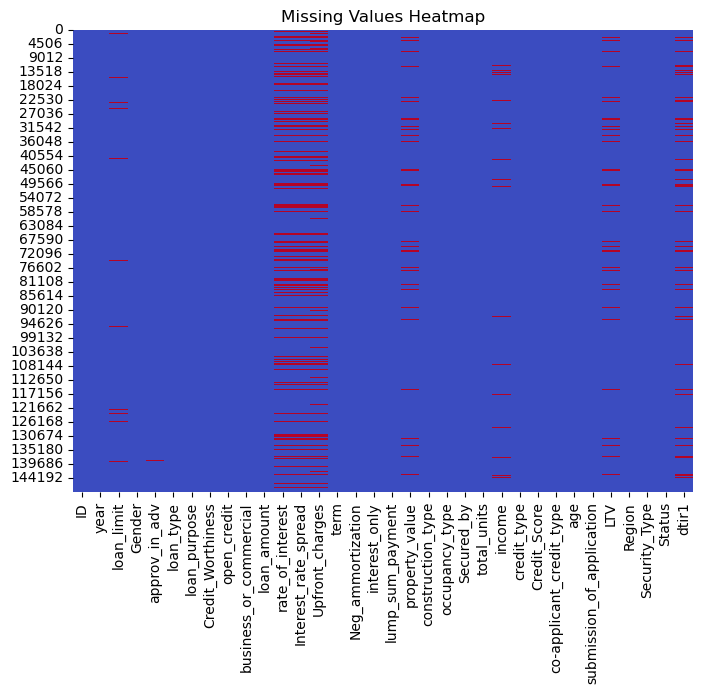

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()

Encode categorical variables

In [46]:
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Check target variable distribution (before balancing)

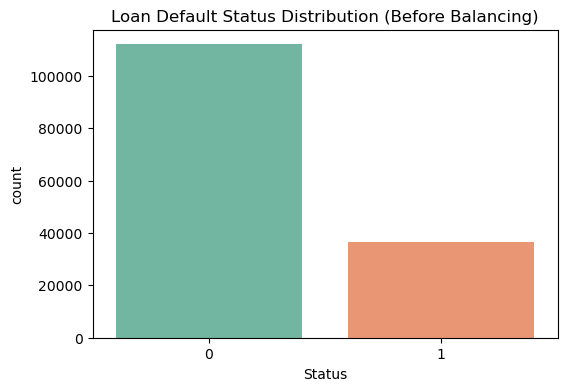

Status
0    112031
1     36639
Name: count, dtype: int64

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x="Status", data=df, palette="Set2")
plt.title("Loan Default Status Distribution (Before Balancing)")
plt.show()

df["Status"].value_counts()

Train-Test Split

In [48]:
X = df.drop("Status", axis=1)
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Scale features

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("Before balancing:\n", y_train.value_counts())
print("\nAfter balancing:\n", y_resampled.value_counts())

ValueError: Input X contains NaN.
SMOTEENN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values